![title](image.jpg)

# Análise do e-commerce no ano de 2015 

In [2]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Lendo a planilha
sales = pd.read_csv('ecommerce.csv',sep=',',low_memory=False)

# Setando as configurações de visualização do df

In [4]:
# Setando a visualização das colunas do df
pd.set_option("display.max_columns",None)

# Visualizando o dataframe

In [5]:
sales.tail()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
51285,FA-2015-30771,1/21/15,1/27/15,6.0,Standard Class,Fashion,Sports Wear,$85.00,5,0.04,$17.00,$1.70,Medium,IN-0040977,Welch Fein,Corporate,Pasadena,Texas,United States,Central,Jan
51286,FA-2015-30772,6/22/15,6/24/15,2.0,Standard Class,Fashion,Sports Wear,$85.00,1,0.03,$2.50,$0.20,Medium,TT-0040978,Martinez Arnett,Corporate,Harare,Harare,Zimbabwe,Africa,Jun
51287,FA-2015-30773,1/1/15,1/7/15,6.0,Standard Class,Fashion,Sports Wear,$85.00,1,0.05,$0.80,$0.10,Medium,ON-0040979,Mccoy Duston,Home Office,Townsville,Queensland,Australia,Oceania,Jan
51288,FA-2015-30774,12/7/15,12/14/15,7.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.04,$28.30,$2.80,Medium,RN-0040980,Bentley Zypern,Consumer,Houston,Texas,United States,Central,Dec
51289,FA-2015-30775,12/1/15,12/6/15,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,$28.30,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Dec


# Tratando os dados

In [6]:
# Retirando os valores nulos
sales.dropna(axis=0,how='any',inplace=True)

In [7]:
# Retirando colunas que não são úteis
sales.drop(columns=['Order ID','Customer ID'],inplace=True)

In [8]:
# Substituindo os valores que estão errados
sales.replace(to_replace=['So3th','4orth','Casula Shoes','xxx'],value=['South','North','Casual Shoes','0.00'],inplace=True)

In [9]:
# Eliminando valores fora do padrão no preço e quantidade
sales = sales.loc[(sales['Sales'] != "0.xf") & (sales['Quantity'] != 'abc')]

In [10]:
# Construindo a lista de países para corrigir a variável Region
South_America = ['Argentina', 'Bolivia', 'Brazil',' Chile', 'Colombia', 'Ecuador',' Guiana', 'Paraguay', 'Peru', 'Suriname',' Uruguay', 'Venezuela']
Asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Burma', 'Cambodia', 'China', 
        'East Timor',' Georgia', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 
        'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon',' Malaysia', 'Mongolia',' Nepal', 
        'North Korea', 'Oman', 'Pakistan', 'Papua New Guinea',' Philippines', 'Qatar',
       ' Saudi Arabia',' Singapore', 'South Korea', 'Sri Lanka', 'Syria',' Taiwan', 'Tajikistan', 'Thailand','Turkey', 
        'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam',' Yemen','Myanmar (Burma)']
North_America = ['United States','Canada','Mexico','Greenland']
Central_America = ['El Salvador', 'Costa Rica', 'Belize',' Guatemala', 'Honduras', 'Nicaragua',' Panama']
Oceania = ['Australia', 'Micronesia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Nauru', 'New Zealand', 'Palau','Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu','Vanuatu']
Europe = ['Germany','Russia','Bosnia and Herzegovina','United Kingdom','France','Italy','Spain','Ukraine','Poland'
          ,'Romania','Netherlands','Belgium','Czech Republic','Greece','Portugal','Sweden','Hungary',
          'Belarus','Austria','Serbia','Switzerland','Bulgaria','Denmark','Finland','Slovakia','Norway','Ireland',
          'Croatia','Moldova','Albania','Lithuania','North Macedonia','Slovenia','Latvia','Estonia','Montenegro','Macedonia',
          'Luxembourg','Malta','Iceland','Andorra','Monaco','Liechtenstein','San Marino','Holy See']
Africa = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cabo Verde', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'the Democratic Republic of Congo', 
          'Cote d’Ivoire',' Djibouti', 'Equatorial Guinea', 'Egypt', 'Eritrea',' Ethiopia, Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 
          'the Kingdom of Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',' Mauritius', 'Morocco',' Mozambique', 'Namibia', 'Niger', 'Nigeria', 
          'Rwanda', 'Saharawi Arab Democratic Republic', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan',' Sudan', 'Kingdom of Swaziland', 
          'Tanzania', 'Togo',' Tunisia', 'Uganda', 'Zambia','Zimbabwe']

In [11]:
# Aplicando a função para organizar a região de acordo com seus países correspondentes
def countries(x):
    for c in South_America:
        if x == c.strip():
            return "America do Sul"
        else :
            x
    for c in Asia:
        if x == c.strip():
            return "Asia"
        else :
            x
    for c in North_America:
        if x == c.strip():
            return "America do Norte"
        else :
            x
    for c in Central_America:
        if x == c.strip():
            return "America Central"
        else :
            x
    for c in Oceania:
        if x == c.strip():
            return "Oceania"
        else :
            x
    for c in Africa:
        if x == c.strip():
            return "Africa"
        else :
            x
    for c in Europe:
        if x == c.strip():
            return "Europa"
        else :
            x
            
#Aplicando a função            
sales['Region_teste'] = sales['Country'].apply(lambda x: countries(x))
# Preenchendo os espaçoes vazios com os valores da antiga coluna de Region
sales['Region_teste'].fillna(sales['Region'],inplace=True)
# Retirando a coluna antiga da Região
sales.drop(columns=['Region'],inplace=True)
# Renomeando a coluna Region_teste
sales.rename(columns={'Region_teste':'Region'},inplace=True)

In [12]:
# Aplicando as funções de ano e mês para serem adicionadas novas colunas no df
def ano(x):
    return str(x).split('-')[0]


def dia(x):
    return str(x).split('-')[2][:2]


sales['Year'] = pd.to_datetime(sales['Order Date'],errors='coerce').apply(lambda x: ano(x))
sales['Day_Order'] = pd.to_datetime(sales['Order Date'],errors='coerce').apply(lambda x: dia(x))
sales['Day_Ship'] = pd.to_datetime(sales['Ship Date'],errors='coerce').apply(lambda x: dia(x))

In [13]:
# Atribuindo uma coluna de valor sem a presença do $
def preco(x):
    return x.split("$")[1]

def preco_custo(x):
    if len(str(x)) >= 6:
        return x.split("$")[1]
    else:
        np.nan

# Aplicando a função
sales['Preço($)'] = sales['Sales'].apply(lambda x: preco(x))
sales['Profit($)'] = sales['Profit'].apply(lambda x: preco(x))
sales['Shipping Cost($)'] = sales['Shipping Cost'].apply(lambda x: preco_custo(x))

# Retirando a coluna sales,profit e shipping cost
sales.drop(columns=['Sales','Profit','Shipping Cost'],errors='coerce',inplace=True)

In [14]:
# Mudando o tipo do valor das colunas
sales['Quantity'] = sales['Quantity'].astype('int32')
sales['Discount'] = pd.to_numeric(sales['Discount'],errors='coerce')
sales['Preço($)'] = pd.to_numeric(sales['Preço($)'],errors='coerce')
sales['Shipping Cost($)'] = pd.to_numeric(sales['Shipping Cost($)'],errors='coerce')
sales['Profit($)'] = pd.to_numeric(sales['Profit($)'],errors='coerce')
sales['Day_Order'] = sales['Day_Order'].astype('int32')
sales['Day_Ship'] = sales['Day_Ship'].astype('int32')

In [15]:
sales.head()

,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Quantity,Discount,Order Priority,Customer Name,Segment,City,State,Country,Months,Region,Year,Day_Order,Day_Ship,Preço($),Profit($),Shipping Cost($)
0,11/9/15,11/17/15,8.0,First Class,Auto & Accessories,Car Media Players,2,0.05,Medium,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Nov,Oceania,2015,9,17,140.0,46.0,4.6
1,6/30/15,7/2/15,2.0,First Class,Auto & Accessories,Car Speakers,3,0.03,Medium,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Jun,Europa,2015,30,2,211.0,112.0,11.2
2,12/5/15,12/13/15,8.0,First Class,Auto & Accessories,Car Body Covers,5,0.01,Critical,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Dec,Oceania,2015,5,13,117.0,31.2,3.1
3,5/9/15,5/16/15,7.0,First Class,Auto & Accessories,Car & Bike Care,2,0.05,High,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,May,Asia,2015,9,16,118.0,26.2,2.6
4,7/9/15,7/18/15,9.0,First Class,Auto & Accessories,Tyre,1,0.04,Critical,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Jul,Oceania,2015,9,18,250.0,160.0,16.0


# Visualização das Tasks e Gráficos

## Correlações

1 - Qual é a correlação entre o preço do produto e o profit associado a ele de acordo com o desconto?

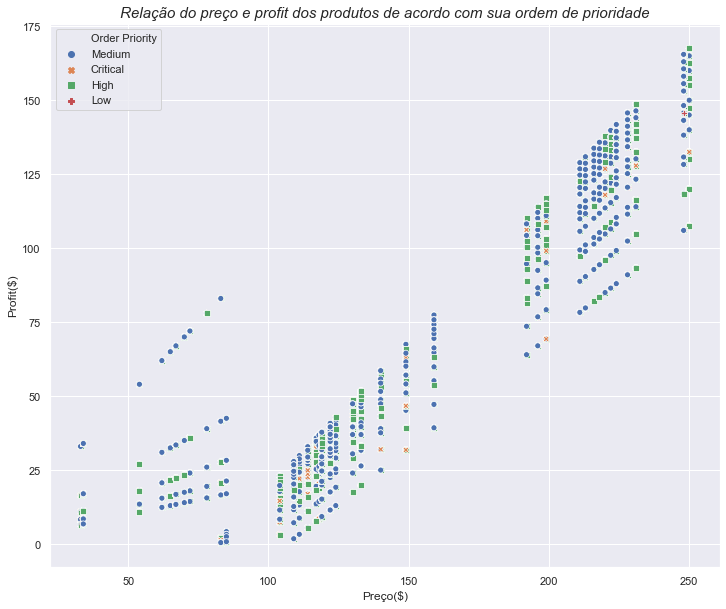

In [192]:
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.scatterplot(x="Preço($)", y="Profit($)", data=sales, color = 'green',hue='Order Priority',style = 'Order Priority')
plt.title("Relação do preço e profit dos produtos de acordo com sua ordem de prioridade",loc='center',style='italic',fontsize=15)
plt.show()

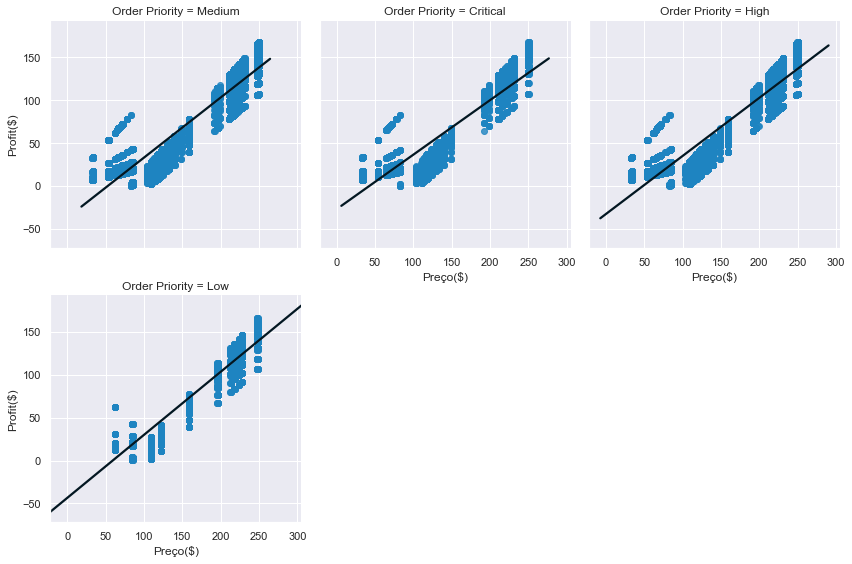

In [193]:
ax = sns.lmplot(x="Preço($)", y="Profit($)", data=sales, col = 'Order Priority', ci= False, height=4, 
                line_kws={'color': '#031722'}, 
                scatter_kws={'color':'#1E84C1'},
               col_wrap=3,
               x_jitter=.3)

2 - Qual é a correlação entre o preço e o profit de acordo com o aging do produto?

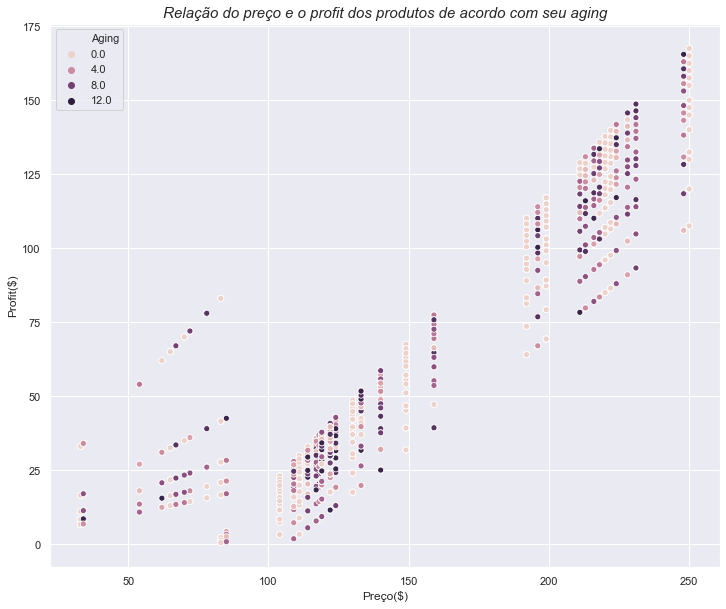

In [132]:
ax = sns.scatterplot(x="Preço($)", y="Profit($)", data=sales, color = 'blue',hue='Aging')
plt.title("Relação do preço e o profit dos produtos de acordo com seu aging",loc='center',style='italic',fontsize=15)
plt.show()

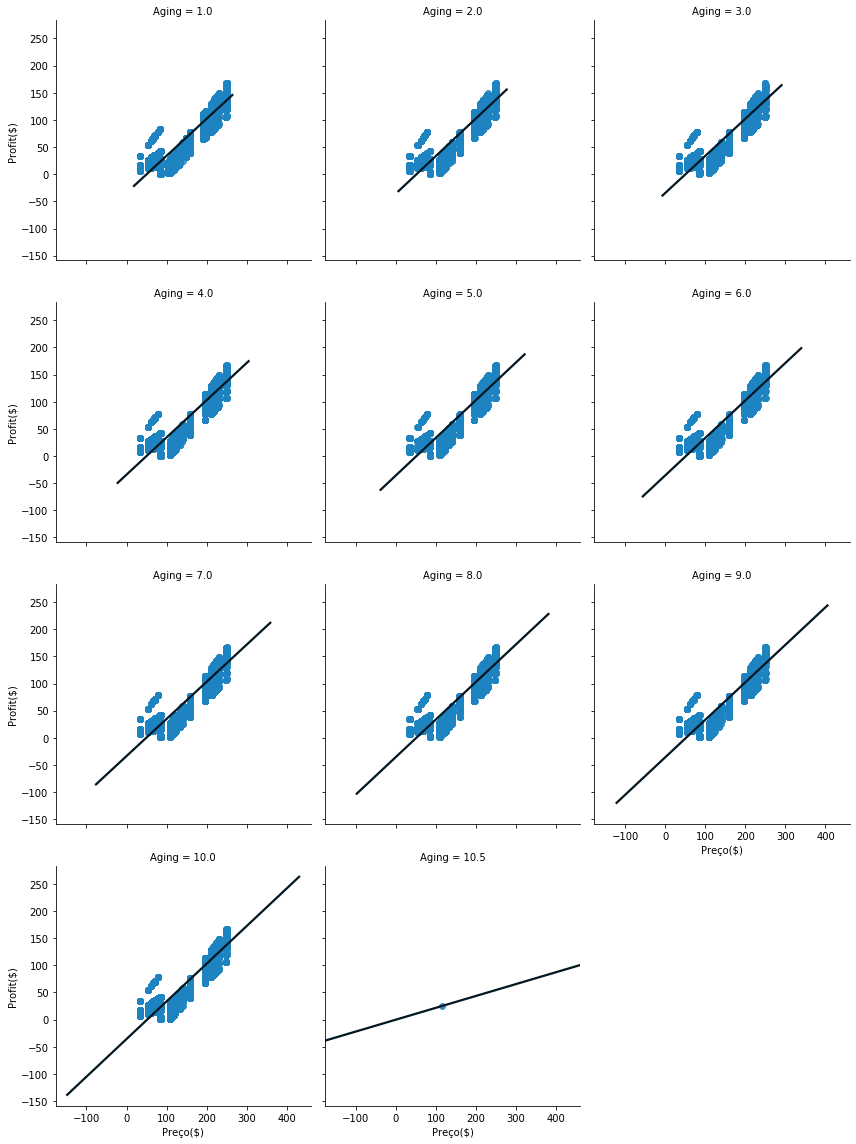

In [20]:
ax = sns.lmplot(x="Preço($)", y="Profit($)", data=sales, col = 'Aging', ci= False, height=4, 
                line_kws={'color': '#031722'}, 
                scatter_kws={'color':'#1E84C1'},
               col_wrap=3,
               x_jitter=.3)

## Produtos

1 - Quais são os 10 produtos que apresentam maior soma de preço ?

In [21]:
prod = pd.DataFrame(sales.groupby('Product')['Preço($)'].sum().sort_values(ascending=False).head(10)).reset_index()
prod

,Product,Preço($)
0,T - Shirts,692912.0
1,Titak watch,637260.0
2,Running Shoes,626080.0
3,Jeans,609092.0
4,Formal Shoes,595335.0
5,Shirts,547624.0
6,Fossil Watch,444564.0
7,Casual Shoes,340990.0
8,Suits,304655.0
9,Sports Wear,240295.0


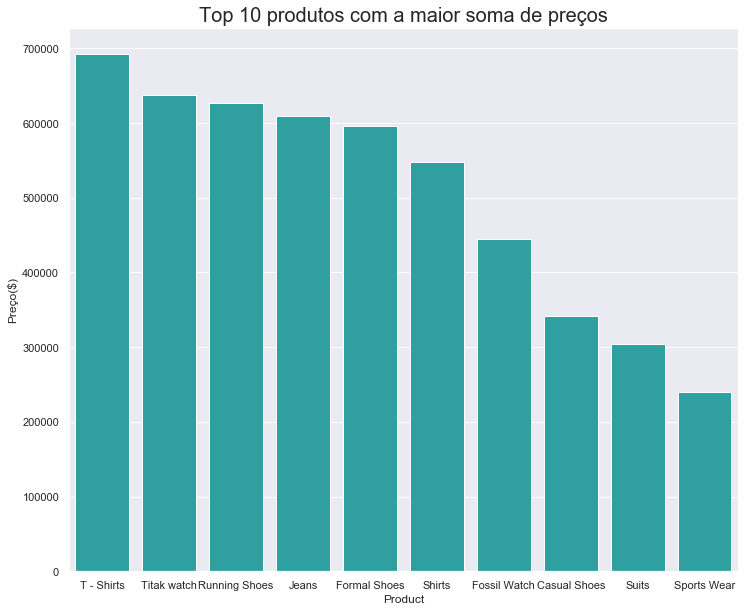

In [200]:
ax = sns.barplot(x="Product", y="Preço($)", data=prod,color="#1CB3B1")
plt.title("Top 10 produtos com a maior soma de preços",fontsize=20)
plt.show()

2 - Quais são os 10 produtos que apresentam maior quantidade de desconto nos preços? E, qual sua relação com o aging?

In [23]:
desc = pd.DataFrame(sales.groupby('Product')['Discount','Aging'].agg({'Discount':'count','Aging':'sum'}).head(10).sort_values(by=['Discount'],ascending=False)).reset_index()
desc

,Product,Discount,Aging
0,Beds,1029,5618.0
1,Bed Sheets,1028,5613.0
2,Car Pillow & Neck Rest,828,4639.0
3,Car Seat Covers,827,4494.5
4,Car & Bike Care,826,4694.0
5,Car Body Covers,826,4584.0
6,Car Mat,825,4612.0
7,Bike Tyres,824,4505.0
8,Car Media Players,824,4608.0
9,Apple Laptop,221,221.0


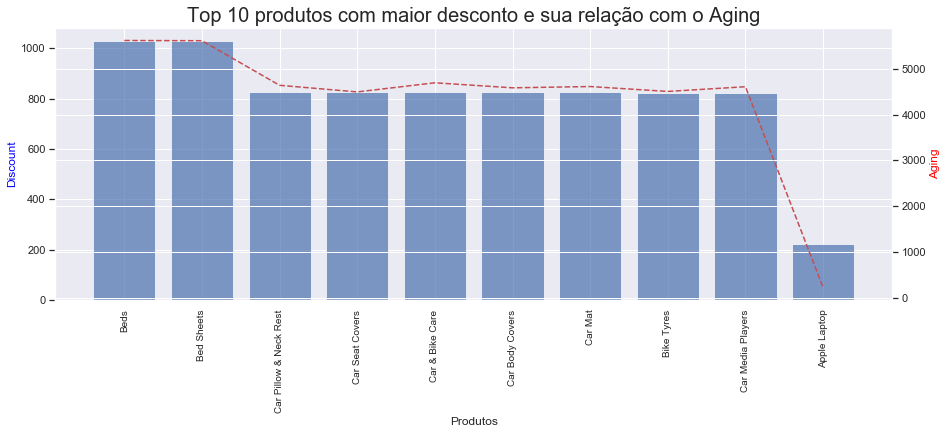

In [202]:
fig, ax1 = plt.subplots(figsize=(15,5))

produtos = [product for product in desc['Product'].values]

ax2 = ax1.twinx()
ax1.bar(produtos,desc['Discount'],color='b',alpha=0.7)
ax2.plot(produtos,desc['Aging'],'r--')
ax1.set_xticklabels(produtos,rotation='vertical',size=10)
plt.title('Top 10 produtos com maior desconto e sua relação com o Aging',loc='center',fontsize=20)
ax1.set_xlabel('Produtos')
ax1.set_ylabel('Discount', color='blue')
ax2.set_ylabel('Aging', color='red')

plt.show()

3 - Quais são os 10 produtos que apresentam maior soma de profit?

In [25]:
prof = pd.DataFrame(sales.groupby('Product')['Profit($)'].sum().head(10).sort_values(ascending=False)).reset_index()
prof

,Product,Profit($)
0,Bed Sheets,114973.1
1,Car Pillow & Neck Rest,107735.8
2,Car Media Players,39879.4
3,Beds,35752.6
4,Apple Laptop,33025.0
5,Bike Tyres,26752.8
6,Car & Bike Care,22700.3
7,Car Body Covers,21629.9
8,Car Mat,20782.8
9,Car Seat Covers,20006.9


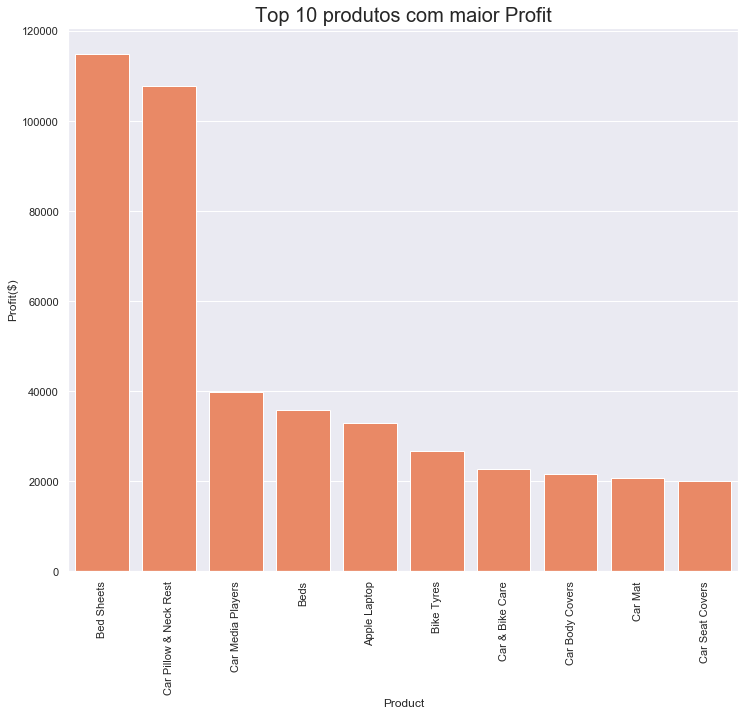

In [67]:
ax = sns.barplot(x="Product", y="Profit($)", data=prof,color='coral')
plt.title("Top 10 produtos com maior Profit",fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

4 - Quais são os produtos vendidos acima de 500 quantidades de acordo com o tipo de segmento ?

In [27]:
seg = sales.groupby(['Product','Segment'])['Quantity'].sum().sort_values(ascending=False).reset_index()
seg = seg.loc[seg['Quantity'] >=500]
seg

,Product,Segment,Quantity
0,Casual Shoes,Consumer,4506
1,Sports Wear,Consumer,4463
2,Suits,Consumer,4437
3,Fossil Watch,Consumer,4429
4,Formal Shoes,Consumer,4422
...,...,...,...
76,Sofa Covers,Home Office,559
77,Umbrellas,Home Office,557
78,Towels,Home Office,557
79,Bed Sheets,Home Office,526


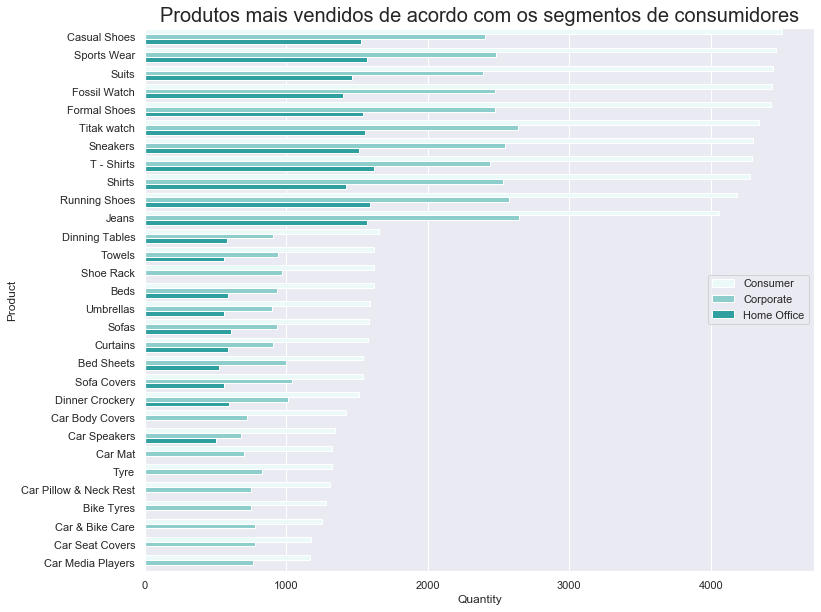

In [28]:
ax = sns.barplot(x="Quantity",y="Product", data=seg, ci=False,orient = 'h', hue = 'Segment',color='#1CB3B1')
plt.legend(loc='best')
plt.title("Produtos mais vendidos de acordo com os segmentos de consumidores",fontsize=20)
plt.show()

## Profit

1 - Qual é a média da distribuição do profit ?

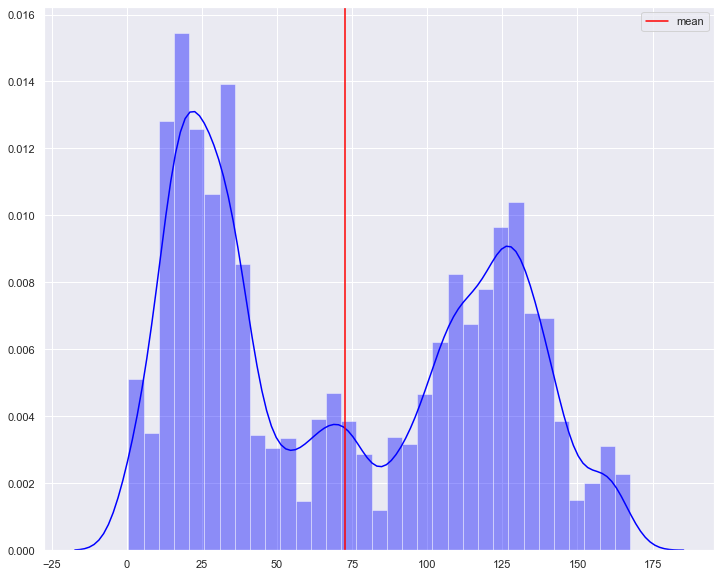

In [29]:
x = sales['Profit($)'].values

mean = sales['Profit($)'].mean()

sns.distplot(x, color = 'blue');
plt.axvline(mean, 0,1, color = 'red',label='mean');
plt.legend()
plt.show()

## Preço

1 - Qual é a média da distribuição do preço ?

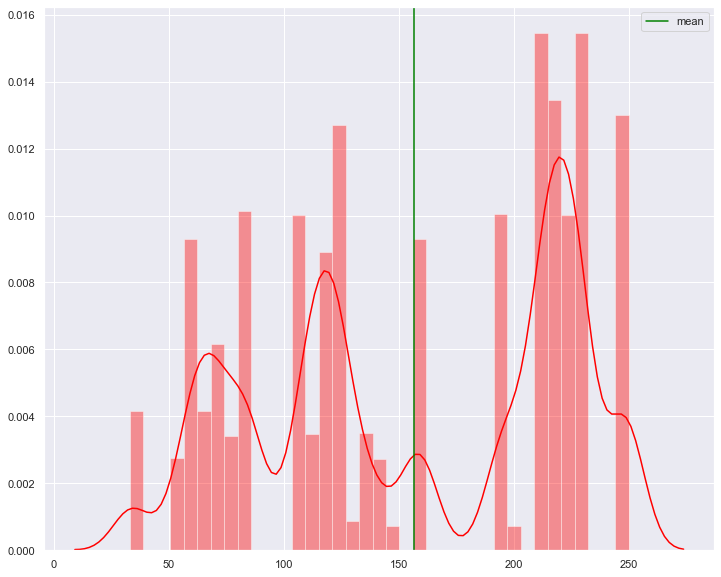

In [30]:
x = sales['Preço($)'].values

mean = sales['Preço($)'].mean()

sns.distplot(x, color = 'red');
plt.axvline(mean, 0,1, color = 'green',label='mean');
plt.legend()
plt.show()

2 - Qual a média de preços de acordo com suas ordens de prioridades?

In [31]:
sales.groupby('Order Priority')['Preço($)'].mean()

Order Priority
Critical    138.526865
High        151.529586
Low         169.556106
Medium      160.319924
Name: Preço($), dtype: float64

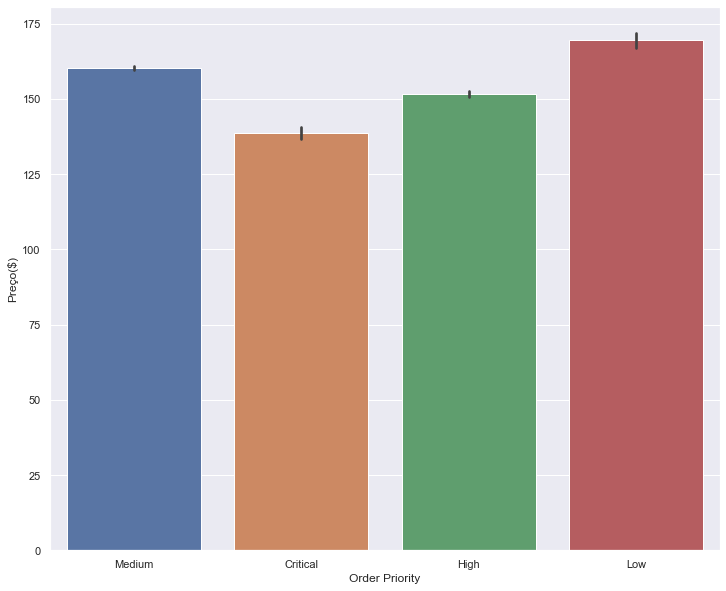

In [32]:
ax = sns.barplot(x="Order Priority", y="Preço($)",data=sales)

## Ordem de pedido e despacho

1 - Qual é o dia que apresenta maior quantidade de ordem de pedido? Qual é o dia que apresenta maior quantidade de ordem de despacho?

In [50]:
# Agrupando de acordo com o dia da ordem de pedido
day_order = pd.DataFrame(sales.groupby(['Day_Order'])['Quantity'].sum().sort_values(ascending=False)).reset_index()

# Agrupando de acordo com o dia de despacho
ship_day = pd.DataFrame(sales.groupby('Day_Ship')['Quantity'].sum().sort_values(ascending=False)).reset_index()

# Printando as respectivas respostas
print(f'O dia que contém maior quantidade de ordem de pedidos é {day_order.loc[0][0]} com {day_order.loc[0][1]} pedidos')
print(f'O dia que contém maior quantidade de despacho dos pedidos é {ship_day.loc[0][0]} com {ship_day.loc[0][1]} despachos')

O dia que contém maior quantidade de ordem de pedidos é 25 com 5257 pedidos
O dia que contém maior quantidade de despacho dos pedidos é 14 com 5262 despachos


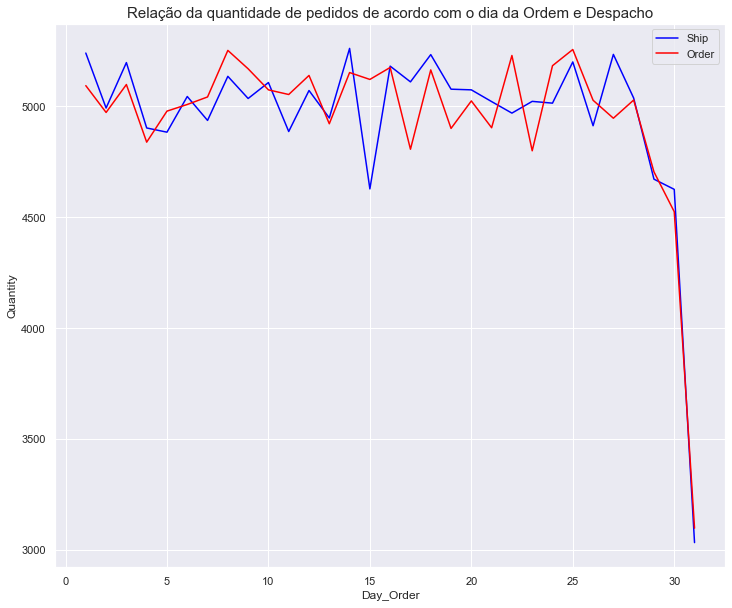

In [40]:
ax = sns.lineplot(y='Quantity',x='Day_Ship',data=ship_day,color='blue',label='Ship')
ax = sns.lineplot(y='Quantity',x='Day_Order',data=day,color='red',label='Order')
plt.title("Relação da quantidade de pedidos de acordo com o dia da Ordem e Despacho",fontsize=15)
plt.legend()
plt.show()

## Mês

1 - Qual é o mês que apresenta maior preço de vendas ?

In [143]:
# Agrupando os dados de acordo com mês
quant_mes = pd.DataFrame(sales.groupby('Months')['Preço($)','Profit($)'].sum().sort_values(by=['Preço($)'],ascending=False)).reset_index()

#Realizando o pint da resposta
print(f'O mês com maior soma de preços é {quant_mes.loc[0][0]} apresentando {quant_mes.loc[0][1]} ($) no total')

O mês com maior soma de preços é Dec apresentando 693073.0 ($) no total


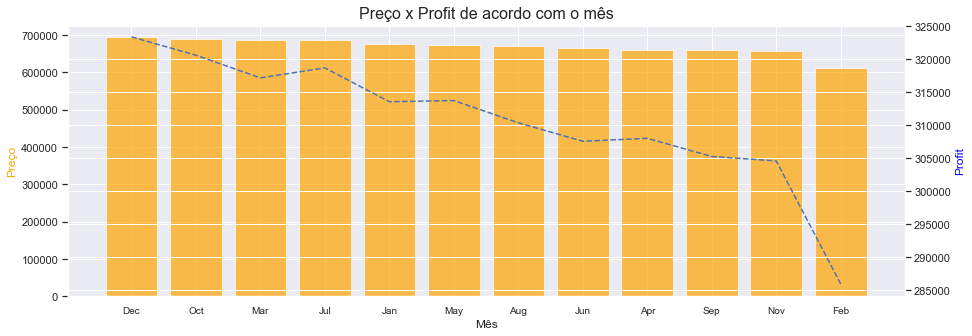

In [144]:
fig, ax1 = plt.subplots(figsize=(15,5))

mes = [mes for mes in quant_mes['Months'].values]

ax2 = ax1.twinx()
ax1.bar(mes,quant_mes['Preço($)'],color='orange',alpha=0.7)
ax2.plot(mes,quant_mes['Profit($)'],'b--')
ax1.set_xticklabels(mes,size=10)
plt.title('Preço x Profit de acordo com o mês',loc='center',fontsize=16)
ax1.set_xlabel('Mês')
ax1.set_ylabel('Preço', color='orange')
ax2.set_ylabel('Profit', color='blue')

plt.show()

## Estado

1 - Quais são os 15 estados que apresentam maior profit?

In [66]:
est = pd.DataFrame(sales.groupby('State')['Profit($)'].sum().sort_values(ascending=False).head(15)).reset_index()
est

,State,Profit($)
0,California,142890.8
1,England,109275.5
2,New York,80855.4
3,Texas,72492.1
4,Ile-de-France,70627.9
5,New South Wales,56139.5
6,Queensland,52913.3
7,North Rhine-Westphalia,50167.2
8,San Salvador,45997.0
9,National Capital,43966.6


## Categoria de Produtos

1 - Qual é a categoria de produto com maior quantidade vendida?

In [146]:
cat = pd.DataFrame(sales.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)).reset_index()

# Realizando o print da resposta
print(f'A categoria de produto com maior quantidade vendida é {cat.loc[0][0]} com {cat.loc[0][1]}')

# Visualizando o agrupamento
cat

A categoria de produto com maior quantidade vendida é Fashion com 92071


,Product Category,Quantity
0,Fashion,92071
1,Home & Furniture,31055
2,Auto & Accessories,22368
3,Electronic,8211


## País

1 - Quais são os 15 países que apresentam maior Shipping Cost? E, qual sua relação com o Aging?

In [110]:
df_pais = pd.DataFrame(sales.groupby('Country')['Shipping Cost($)','Aging'].sum().sort_values(by=['Shipping Cost($)'],ascending=False).head(15)).reset_index()
df_pais

,Country,Shipping Cost($),Aging
0,United States,72479.2,52677.0
1,Australia,20533.8,14953.0
2,France,20358.1,14686.0
3,Mexico,19382.3,13670.0
4,Germany,14995.5,10893.0
5,China,13671.8,9773.0
6,United Kingdom,11863.4,8559.0
7,Brazil,11531.3,8404.0
8,India,11454.0,8372.0
9,Indonesia,10536.7,7335.0


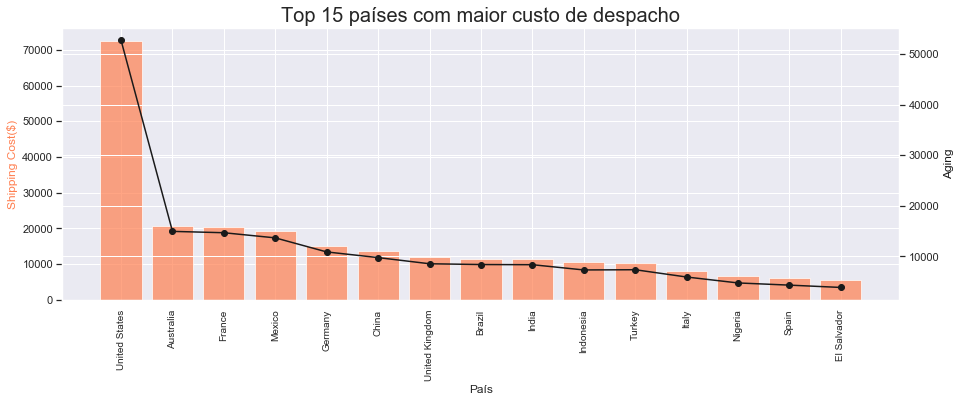

In [111]:
fig, ax1 = plt.subplots(figsize=(15,5))

pais = [pais for pais in df_pais['Country'].values]

ax2 = ax1.twinx()
ax1.bar(pais,df_pais['Shipping Cost($)'],color='coral',alpha=0.7)
ax2.plot(pais,df_pais['Aging'],'k-o')
ax1.set_xticklabels(pais,rotation='vertical',size=10)
plt.title("Top 15 países com maior custo de despacho",fontsize=20,loc='center')
ax1.set_xlabel('País')
ax1.set_ylabel('Shipping Cost($)', color='coral')
ax2.set_ylabel('Aging', color='k')

plt.show()

3 - Qual país da América do Sul apresenta maior desconto ?

In [119]:
am_sul = sales.loc[sales['Region'] == "America do Sul"]
am_sul.shape

(2987, 22)

In [120]:
desc_sul = pd.DataFrame(am_sul.groupby('Country')['Discount'].sum()).reset_index()
desc_sul

,Country,Discount
0,Argentina,11.87
1,Bolivia,1.46
2,Brazil,47.89
3,Chile,4.30
4,Colombia,10.97
5,Ecuador,1.60
6,Paraguay,0.43
7,Peru,4.87
8,Uruguay,0.75
9,Venezuela,5.92


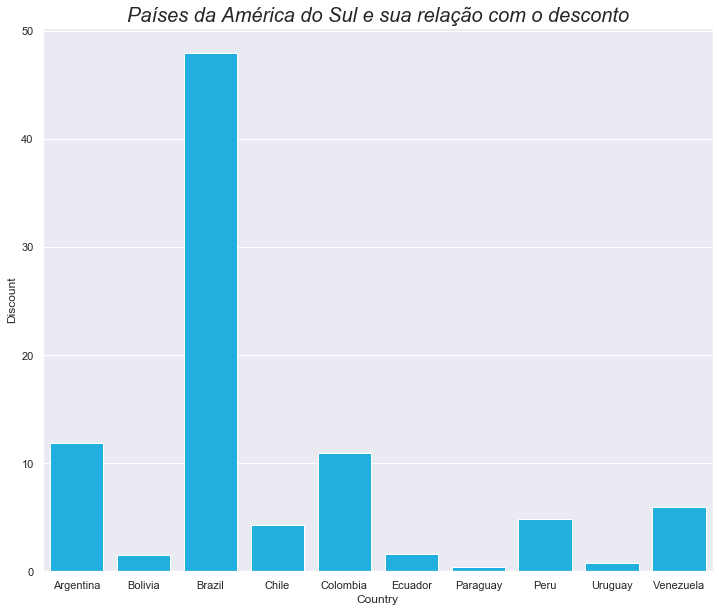

In [203]:
sns.barplot(x='Country',y='Discount',data=desc_sul,color='deepskyblue')
plt.title("Países da América do Sul e sua relação com o desconto",fontsize=20,style='italic')
plt.show()

4 - No Brasil, quais são os 15 produtos mais vendidos?

In [121]:
br = am_sul.loc[am_sul['Country'] == 'Brazil']
br_prod = pd.DataFrame(br.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(15)).reset_index()
br_prod

,Product,Quantity
0,Sports Wear,306
1,T - Shirts,293
2,Fossil Watch,283
3,Suits,279
4,Sneakers,274
5,Titak watch,271
6,Formal Shoes,255
7,Shirts,251
8,Running Shoes,236
9,Casual Shoes,233


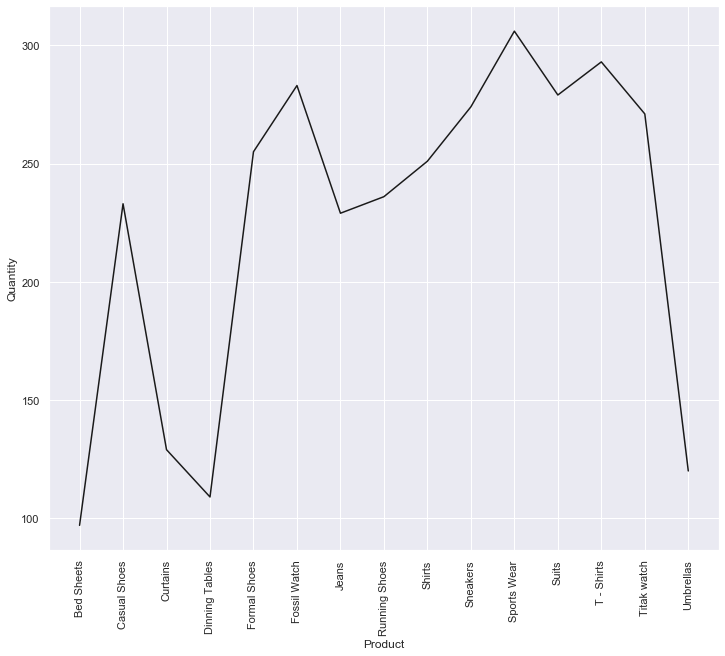

In [196]:
sns.lineplot(x='Product',y='Quantity',data=br_prod,color='k')
plt.xticks(rotation='vertical')
plt.show()

5 - No Brasil, quais são os 30 estados que apresentam maior média de preços?

In [123]:
est_prod = pd.DataFrame(br.groupby('State')['Preço($)'].mean().sort_values(ascending=False).head(30)).reset_index()
est_prod.head()

,State,Preço($)
0,Sergipe,179.666667
1,Mato Grosso do Sul,177.500000
2,Acre,176.833333
3,Amapá,175.250000
4,Rio Grande do Norte,170.111111


6 - No Brasil , quais são as 10 cidades que apresentam maior aging?

In [130]:
ag_br = pd.DataFrame(br.groupby('City')['Aging'].sum().sort_values(ascending=False).head(10)).reset_index()
ag_br

,City,Aging
0,São Paulo,793.0
1,Salvador,226.0
2,Brasília,199.0
3,Curitiba,158.0
4,Presidente Dutra,155.0
5,Manaus,148.0
6,Indaial,130.0
7,Bom Jesus da Lapa,130.0
8,São Miguel dos Campos,130.0
9,Recife,114.0


7 - No Brasil, quais são as 10 cidades que apresentam menor aging ?

In [131]:
ag_br_menos = pd.DataFrame(br.groupby('City')['Aging'].sum().sort_values(ascending=True).head(10)).reset_index()
ag_br_menos

,City,Aging
0,Ipatinga,1.0
1,Itapeva,1.0
2,Catalão,1.0
3,Mococa,1.0
4,Várzea Grande,1.0
5,Tatuí,1.0
6,Rondonópolis,1.0
7,Lençóis Paulista,1.0
8,Uberlândia,1.0
9,Farroupilha,1.0


## Customer name

1 - Quais são os 20 consumidores que apresentam maior média de gasto de acordo com seu segmento ?

In [81]:
# Descobrindo se existem nomes duplicados
a = sales.duplicated(subset=['Customer Name']).sum()
print(f'Existem {a} nomes de consumidores duplicados')

Existem 50485 nomes de consumidores duplicados


In [114]:
# Exemplo de nome que se repete no dataframe
sales.loc[sales['Customer Name'] == "Abbott Mackendrick"].head(10)

,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Quantity,Discount,Order Priority,Customer Name,Segment,City,State,Country,Months,Region,Year,Day_Order,Day_Ship,Preço($),Profit($),Shipping Cost($)
850,3/16/15,3/19/15,3.0,First Class,Auto & Accessories,Tyre,3,0.01,Critical,Abbott Mackendrick,Corporate,Alexandria,Al Iskandariyah,Egypt,Mar,Africa,2015,16,19,250.0,162.5,16.3
886,10/31/15,11/9/15,9.0,First Class,Auto & Accessories,Tyre,2,0.02,High,Abbott Mackendrick,Corporate,Alexandria,Al Iskandariyah,Egypt,Oct,Africa,2015,31,9,250.0,160.0,16.0
2534,12/5/15,12/13/15,8.0,First Class,Auto & Accessories,Bike Tyres,1,0.04,Critical,Abbott Mackendrick,Corporate,Calgary,Alberta,Canada,Dec,America do Norte,2015,5,13,72.0,72.0,7.2
3060,7/16/15,7/25/15,9.0,First Class,Auto & Accessories,Car Media Players,3,0.05,High,Abbott Mackendrick,Corporate,La Romana,La Romana,Dominican Republic,Jul,Caribbean,2015,16,25,140.0,39.0,3.9
3174,4/6/15,4/8/15,2.0,First Class,Auto & Accessories,Car Mat,2,0.04,Critical,Abbott Mackendrick,Corporate,Calgary,Alberta,Canada,Apr,America do Norte,2015,6,8,54.0,27.0,2.7
4317,5/25/15,6/1/15,7.0,First Class,Auto & Accessories,Car Mat,5,0.03,Critical,Abbott Mackendrick,Corporate,Alexandria,Al Iskandariyah,Egypt,May,Africa,2015,25,1,54.0,10.8,1.1
5171,6/30/15,7/10/15,10.0,First Class,Auto & Accessories,Tyre,2,0.05,High,Abbott Mackendrick,Corporate,Alexandria,Al Iskandariyah,Egypt,Jun,Africa,2015,30,10,250.0,145.0,14.5
5385,7/18/15,7/28/15,10.0,First Class,Auto & Accessories,Car Body Covers,3,0.05,High,Abbott Mackendrick,Corporate,Providence,Rhode Island,United States,Jul,America do Norte,2015,18,28,117.0,19.5,1.9
5510,1/17/15,1/22/15,5.0,First Class,Auto & Accessories,Car Speakers,3,0.05,High,Abbott Mackendrick,Corporate,Alexandria,Al Iskandariyah,Egypt,Jan,Africa,2015,17,22,211.0,99.4,9.9
5685,7/23/15,8/2/15,10.0,First Class,Auto & Accessories,Bike Tyres,3,0.03,Medium,Abbott Mackendrick,Corporate,Cartagena,Bolívar,Colombia,Jul,America do Sul,2015,23,2,72.0,24.0,2.4


In [97]:
# Agrupando os nomes de acordo com seus segmentos e descobrindo quais apresentam maior gasto, ou seja, com a maior soma de preço
df_dp = sales.loc[sales.duplicated(subset=['Customer Name'])]
df_name = pd.DataFrame(df_dp.groupby(['Customer Name','Segment'])['Preço($)'].mean()).reset_index()
df_name.head(20)

,Customer Name,Segment,Preço($)
0,Abbott Mackendrick,Corporate,158.967742
1,Acosta Morse,Corporate,165.573770
2,Adams Barchas,Consumer,136.029412
3,Adkins Jones,Consumer,150.662500
4,Aguilar Hopkins,Consumer,147.148649
5,Alexander Brumley,Consumer,149.615385
6,Allen Ausman,Corporate,157.061224
7,Allison Meade,Corporate,164.452055
8,Alvarado Kriz,Home Office,168.725000
9,Alvarez Eaton,Corporate,155.190476


## Região

1 - Qual região  apresenta maior quantidade de produtos vendidos?

In [135]:
reg_prod = pd.DataFrame(sales.groupby('Region')['Quantity'].sum().sort_values(ascending=False)).reset_index()
reg_prod

,Region,Quantity
0,America do Norte,39193
1,Europa,34988
2,Asia,32593
3,Africa,13630
4,Oceania,10374
5,America do Sul,9049
6,America Central,8900
7,Caribbean,4978


2 - Qual região apresenta melhor média de Profit?

In [147]:
reg_prof = pd.DataFrame(sales.groupby('Region')['Profit($)'].mean().sort_values(ascending=False)).reset_index()
reg_prof

,Region,Profit($)
0,Asia,74.089838
1,America do Norte,72.684676
2,Oceania,72.671824
3,Africa,72.430440
4,America Central,72.356561
5,Europa,72.133197
6,America do Sul,71.887379
7,Caribbean,71.365740


## Visualização da correlação entre o Preço e o Profit

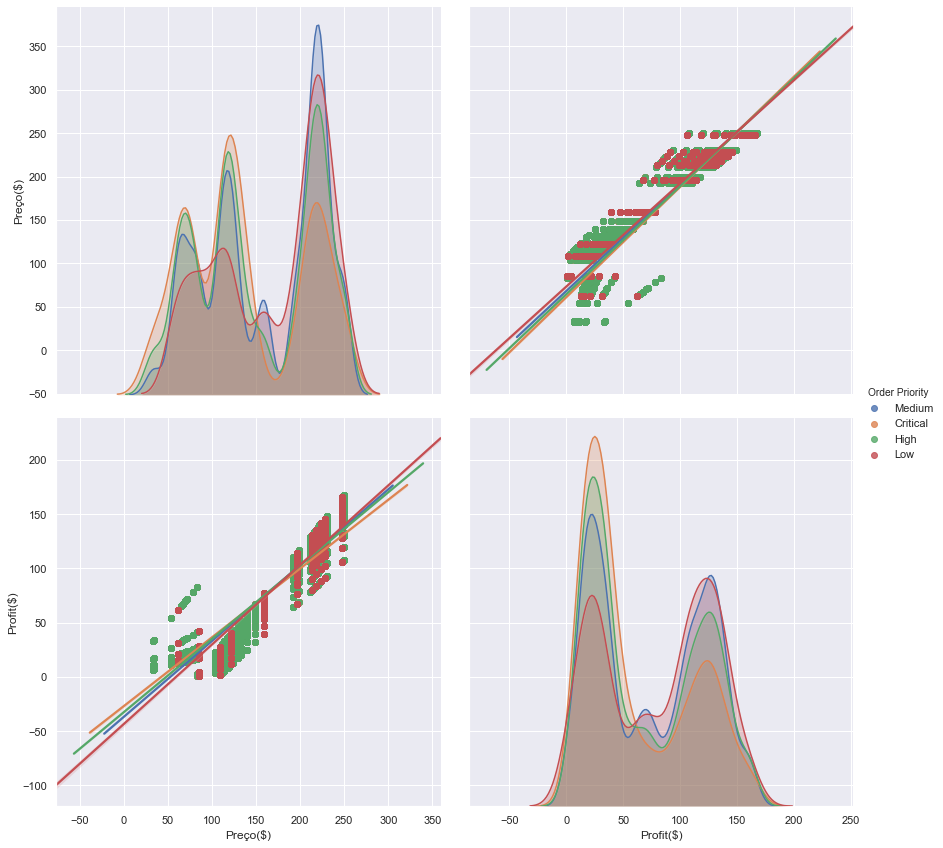

In [190]:
g = sns.pairplot(sales[['Preço($)','Profit($)','Order Priority']],kind="reg", hue='Order Priority',height= 6)

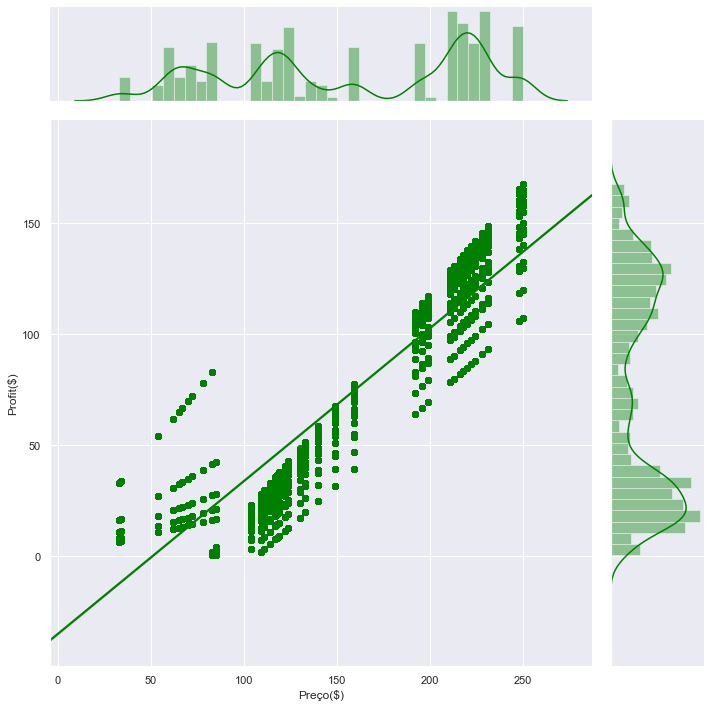

In [188]:
g = sns.jointplot("Preço($)", "Profit($)", data=sales, kind="reg", color = 'green', height = 10)

In [186]:
pc = sales[['Preço($)','Profit($)','Discount']].corr(method ='pearson')
pc

,Preço($),Profit($),Discount
Preço($),1.000000,0.921521,-0.007263
Profit($),0.921521,1.000000,-0.119047
Discount,-0.007263,-0.119047,1.000000


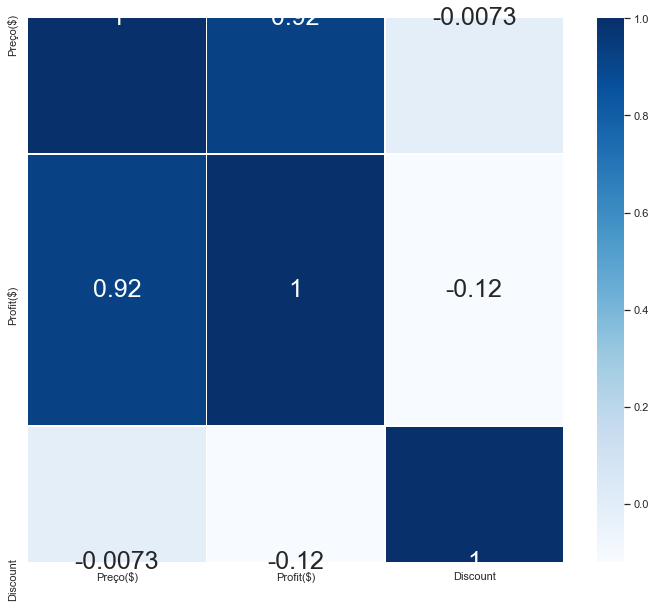

In [197]:
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.heatmap(pc, annot=True,linewidths=.5,
                 annot_kws={'size': 25},
                 cmap="Blues")

# Análise de Regressão Linear

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt